In [1]:
import numpy as np
import lib.gradients as grad
import lib.data as data
import matplotlib.pyplot as plt
import lib.mesurements
import lib.haar_wawelet_method.haar as haar
%matplotlib inline

In [2]:
def my_exp(x,y,w1,w2):
    if (w1 == 0):
        return np.exp( w2*1j*y)
    return np.exp(w1*1j*x + w2*1j*y)

In [31]:
def draw_plot(z):
    size = z.shape[0]
    x,y = np.meshgrid(range(0,size),range(0,size))
    from mpl_toolkits.mplot3d import Axes3D
    fig = plt.figure(figsize=(30,30))
    ax = fig.gca(projection='3d')
    ax.plot_wireframe(x, y, z)
    ax.set_zlim(0, 0.5)
    ax.set_xlim(0,size)
    ax.set_ylim(0,size)
    from matplotlib.ticker import MultipleLocator, FormatStrFormatter
    majorLocator = MultipleLocator(1)
    majorFormatter = FormatStrFormatter('%d')
    ax.xaxis.set_major_locator(majorLocator)
    ax.xaxis.set_major_formatter(majorFormatter)
    ax.yaxis.set_major_locator(majorLocator)
    ax.yaxis.set_major_formatter(majorFormatter)
    plt.savefig('z-plot-ideal')

In [15]:
def compare_ideal(i,j,M, noised = False, photons = 1):
    x,y = data.get_plane(-np.pi, np.pi, -np.pi, np.pi, M)
    im = my_exp(x,y,i,j)
    grad_X, grad_Y = i * x * 1j * my_exp(x,y,i,j), j * y * 1j * my_exp(x,y,i,j)
    if (noised):
        #как зашумлять комплексные числа?
        grad_X = data.get_Poisson_noise(grad_X.real, photons) + 1j*data.get_Poisson_noise(grad_X.imag, photons)
        grad_Y = data.get_Poisson_noise(grad_Y.real, photons) + 1j*data.get_Poisson_noise(grad_Y.imag, photons)
    LH, HL, HH = haar.analyze(grad_X, grad_Y, grad_X, grad_Y)
    res = haar.syntesis({0:np.array([[np.mean(im)*2**M]])}, LH, HL, HH,M)
    return np.abs(np.fft.fft2(im)[j,i])/np.abs(np.fft.fft2(res[M])[j,i])

In [16]:
def calc_z_ideal (M, noised = False, photons = 1):
    size = 2**M
    z = np.zeros(size**2).reshape(size,size)
    for i in range (size):
        print(i)
        if (i*10 <= size):
            for j in range(size):
                if (j*10 <= size):
                    z[i,j] = compare_ideal(i,j,M, noised,photons)
                else:
                    break
        else :
            break
    return z

In [41]:
z = calc_z_ideal(6, False)

0
1
2
3
4
5
6
7


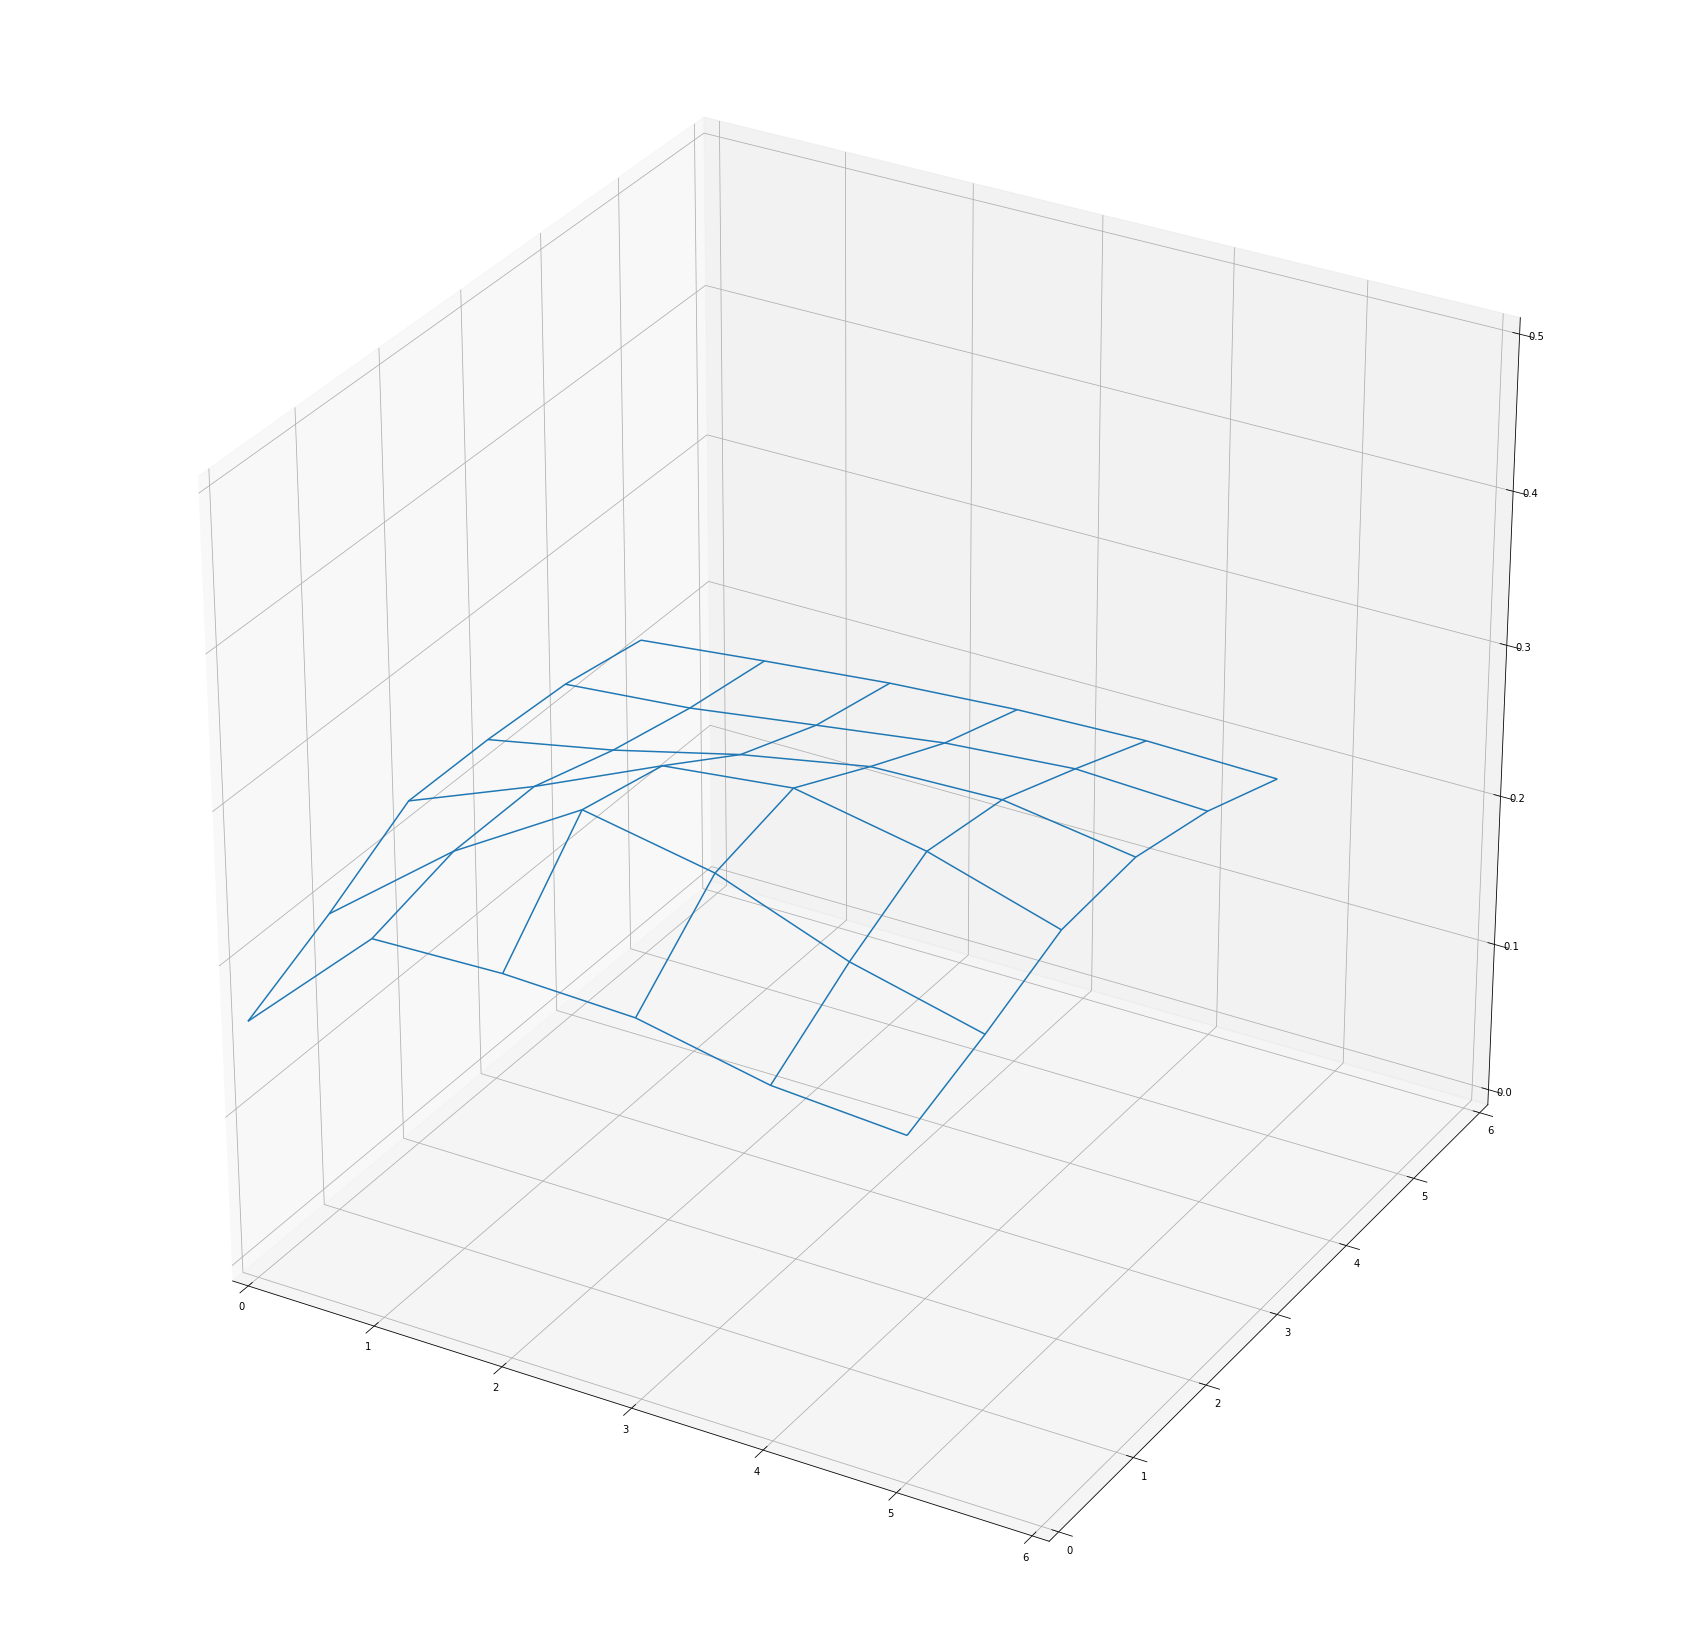

In [43]:
draw_plot(z[1:z.shape[0] // 10 + 1, 1:z.shape[0] // 10 + 1])

In [39]:
x,y = data.get_plane(-np.pi, np.pi, -np.pi, np.pi, 6)
im = my_exp(x,y,3,3)
grad_X, grad_Y = 3 * x * 1j * my_exp(x,y,3,3), 3 * y * 1j * my_exp(x,y,3,3)
LH, HL, HH = haar.analyze(grad_X, grad_Y, grad_X, grad_Y)
res = haar.syntesis({0:np.array([[np.mean(im)*2**6]])}, LH, HL, HH,6)
np.abs(np.fft.fft2(res[6])[3,3])

13907.892690715842

In [40]:
np.abs(np.fft.fft2(im)[3,3])

4065.5422034138596